In [3]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_raw, y_raw = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)

df = pd.DataFrame(X_raw, columns=[f"feature_{i}" for i in range(10)])
df["target"] = y_raw

print("Random Data Generated Successfully!")
df.head()

Random Data Generated Successfully!


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0


Accuracy on Random Data: 0.9600


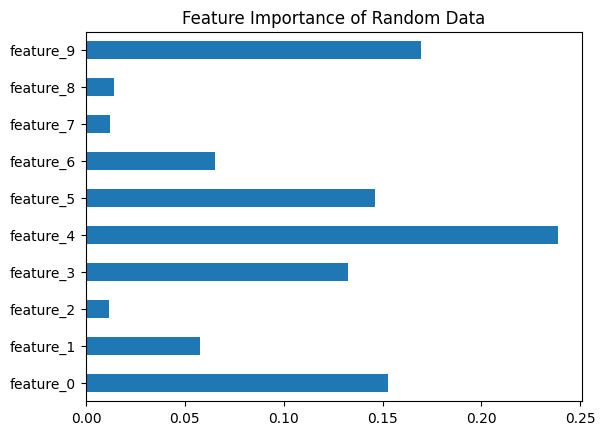

In [4]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)
print(f"Accuracy on Random Data: {accuracy_score(y_test, pred):.4f}")

import matplotlib.pyplot as plt
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.title("Feature Importance of Random Data")
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_scaled = sc.fit_transform(X)

X_train_sc, X_test_sc, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)

knn_pred = knn.predict(X_test_sc)

print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}")

KNN Accuracy: 0.8950
